### Importing data using Pandas 

In [351]:
import pandas as pd
import numpy as np 

In [352]:
Usage = pd.read_csv("Usage2.csv")


In [353]:
complaint = pd.read_csv('complaint.csv')

### Making a data frame for two individual Excell sheet 

In [354]:
complaint.head()

,CSN,Device,Location,Symptom,Duration,Date
0,C-221-82070,C,D,DI,0.03,11/4/21
1,C-221-65822,C,U,LP,0.10,1/19/21
2,C-221-22846,C,D,BL,0.42,3/25/21
3,C-221-77792,C,U,PS,17.29,2/25/21
4,C-221-6632,C,U,HM,5.32,8/10/21


In [355]:
# using head function that will show first few rows of data frame
Usage.head()

,USN,Date,Device,Duration,Location
0,1385441,1/1/21,C,1.82,U
1,1385442,1/1/21,C,8.68,U
2,1385443,1/1/21,C,2.59,U
3,1385444,1/1/21,C,0.08,O
4,1385445,1/1/21,C,5.45,U


## 1.Preprocessing/ Cleaning Data 

Apart from Duration coulmn any other feild must no have any empty feild must not have any missing data.

In [369]:
# using dropna function to drop the rows with empty cells from column 'CSN','Device','Location','Symptom','Date'
complaint=complaint.dropna(axis = 'index',how = 'any', subset = ['CSN','Device','Location','Symptom','Date'])


In [368]:
# using dropna function to drop the rows with empty cells from column 'CSN','Device','Location','Symptom','Date'
Usage=Usage.dropna(axis = 'index',how = 'any', subset = ['USN','Date','Device','Date'])

#### a). USN uniquely identifies a Usage. It must be a numeric 7-digit value. So, There are some feild with some extra charecter in the end(after the seven digit id). There is no point of removing the whole row because of that. That's why I made a function that can romove that last extra charecter from that feild.

In [358]:
# using function that will remove the any elemets after first 7 element to organize the correct USN
def clean_col(s):
  return s[:7]
Usage['USN']=Usage['USN'].apply(clean_col)
# print to verify wether the fuction works correctly or not before this fuction the value of USN:1385537A
print(Usage.iloc[96])

USN         1385537
Date         1/5/21
Device            O
Duration       0.87
Location          U
Name: 96, dtype: object


## 2) Exploratory analysis

### a) Shape of data set 

In [359]:
# AS we can see after the cleaning there are 15688 rows for 5 columns (Usage)
Usage.shape

(13691, 5)

In [360]:
# AS we can see after the cleaning there are 979 rows for 6 columns (Complaint)
complaint.shape

(978, 6)

In [361]:
Usage.describe()

,Duration
count,13691.000000
mean,12.720420
std,56.120855
min,-6.880000
25%,0.080000
50%,0.230000
75%,2.940000
max,428.480000


In [362]:
complaint.describe()

,Duration
count,973.000000
mean,15.238746
std,59.279659
min,-0.020000
25%,0.080000
50%,1.310000
75%,6.730000
max,419.630000


### Data types for each variable

In [370]:
# AS we can see apart from Duration which has float values other Variables are classified as object
Usage.dtypes

USN          object
Date         object
Device       object
Duration    float64
Location     object
dtype: object

In [371]:
# ## AS we can see apart from Duration which has float values other Variables are classified as object
complaint.dtypes

CSN          object
Device       object
Location     object
Symptom      object
Duration    float64
Date         object
dtype: object

### b). Number of Usages by Device and Location?

In [372]:
# importing matplotlib and seaborn Libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#### The output bellow represent the Frequency of each device from usage data set

In [373]:
# getting the count of each data types
Usage['Device'].value_counts() 

C    9910
T    2656
O     635
F     490
Name: Device, dtype: int64

### The graph below represents the number of device Usage for each location.

In [534]:
# this function will anote the number for each bar showing it's number on top of the bar
def anote(plot):
    for bar in plot.patches:
        plot.annotate(format(bar.get_height(), '.2f'),
                           (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center',
                           size=8, xytext=(0, 8),
                           textcoords='offset points')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Usage')

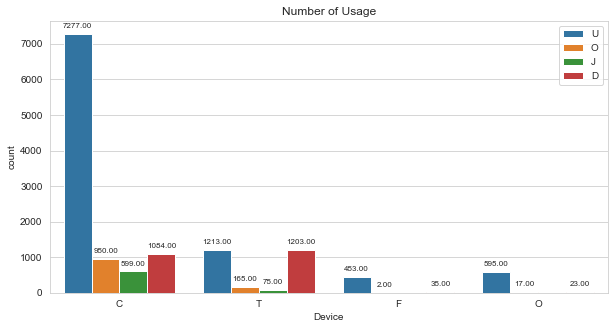

In [682]:
# using subplot to adjust the size of graph
fig, ax = plt.subplots(figsize=(10, 5))
plot=sns.countplot('Device',hue='Location',data=Usage,ax=ax)
# function that will annotate each bar with the value it raches in the graph
anote(plot)
# adjust the Location legend
plt.legend(loc='upper right')
plt.title('Number of Usage')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of complain')

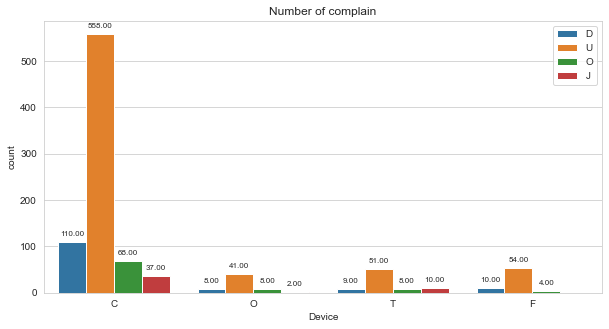

In [683]:
# the visulization here represents the number of complains for each device however it will not depict anything 
# about Symptoms
fig, ax = plt.subplots(figsize=(10, 5))
plot=sns.countplot('Device',hue='Location',data=complaint,ax=ax)
anote(plot)
plt.legend(loc='upper right')
plt.title('Number of complain')

In [376]:
# It defines the number of complins for each device
complaint['Device'].value_counts()

C    773
T     78
F     68
O     59
Name: Device, dtype: int64

### c) Number of Complaints by Device, Location and Symptom.

#### In order to include the symptoms I have to seprate the data set for each device and then apply bar plot for each symptom and location.

In [377]:
# filltering the data for device 'C'
complaint['Device']=='C' 

0      True
1      True
2      True
3      True
4      True
       ... 
973    True
974    True
975    True
976    True
977    True
Name: Device, Length: 978, dtype: bool

In [378]:
#This will fillter each data set accordint to the type of device and storing it into seprate data frame 
ComplaintC=complaint.loc[complaint['Device']=='C']
ComplaintT=complaint.loc[complaint['Device']=='T']
ComplaintF=complaint.loc[complaint['Device']=='F']
ComplaintO=complaint.loc[complaint['Device']=='O']

#### Using countplot to represent teh frequancy of complains for each device including perticular Symptom. Moreover each bar with different color shows the location.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

Text(0.5, 1.0, 'Device Type: O')

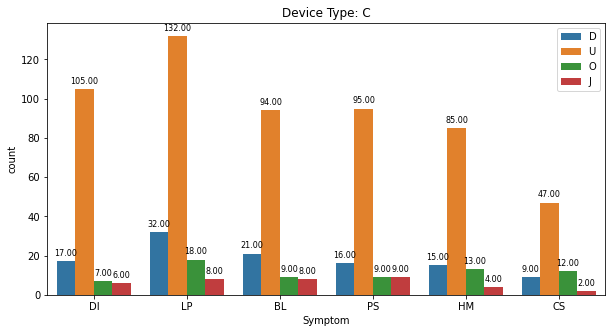

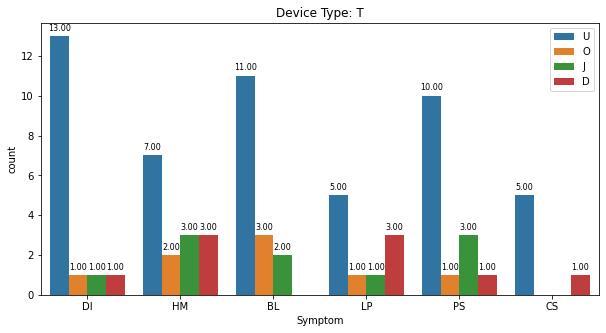

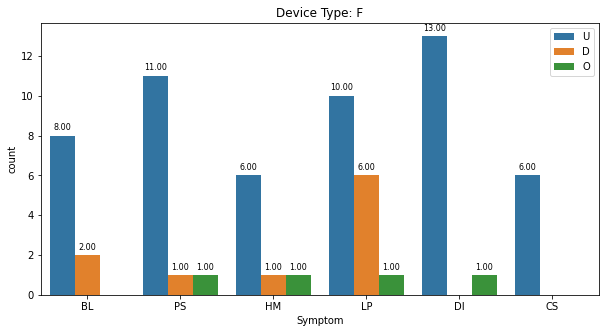

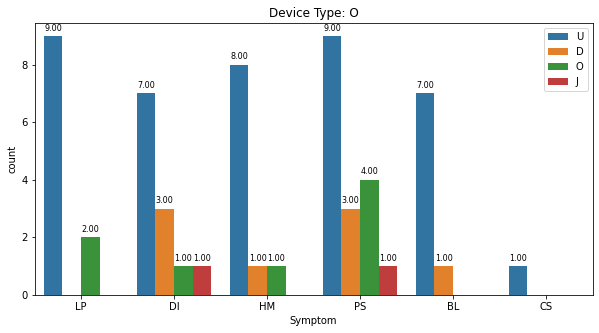

In [538]:
# Using subplot to septate each visulization
fig, ax = plt.subplots(figsize=(10, 5))
fig, ax1 = plt.subplots(figsize=(10, 5))
fig, ax2 = plt.subplots(figsize=(10, 5))
fig, ax3 = plt.subplots(figsize=(10, 5))
# Using countplot to represent teh frequancy complains for each device regarding perticular Symptom
# This will works for Device: C
plot1=sns.countplot('Symptom',hue='Location',data=ComplaintC,ax=ax)
anote(plot1)
ax.legend(loc='upper right')
ax.set_title('Device Type: C')
# This will works for Device: T
plot2=sns.countplot('Symptom',hue='Location',data=ComplaintT,ax=ax1)
anote(plot2)
ax1.legend(loc='upper right')
ax1.set_title('Device Type: T')
# This will works for Device: F
plot3=sns.countplot('Symptom',hue='Location',data=ComplaintF,ax=ax2)
anote(plot3)
ax2.legend(loc='upper right')
ax2.set_title('Device Type: F')
# This will works for Device: O
plot4=sns.countplot('Symptom',hue='Location',data=ComplaintO,ax=ax3)
anote(plot4)
ax3.legend(loc='upper right')
ax3.set_title('Device Type: O')



#### here is Complain rate for foe whole data set for each device 

### Find Complaint rates Overall

In [381]:
Usagebydevice = []
complaintbydevice = []
Usagebydevice = Usage['Device'].value_counts()
Complaintbydevice = complaint['Device'].value_counts()

complaintret = []
complaintret = Usagebydevice/Complaintbydevice

print(complaintret)

C    12.820181
F     7.205882
O    10.762712
T    34.051282
Name: Device, dtype: float64


### In order to get the monthly complain rate first I need to get the month from date Column for both Usage and complain 

In [382]:
# to represent the monthly complan rate I need to change the date to month format For USage
import datetime
month=[]
for i in range(len(Usage)):
  month.append(str(Usage.iloc[i]['Date']).split('/')[0])
Usage['Month']=month
Usage.head()

,USN,Date,Device,Duration,Location,Month
0,1385441,1/1/21,C,1.82,U,1
1,1385442,1/1/21,C,8.68,U,1
2,1385443,1/1/21,C,2.59,U,1
3,1385444,1/1/21,C,0.08,O,1
4,1385445,1/1/21,C,5.45,U,1


In [383]:
# # to represent the monthly complan rate I need to change the date to month format For complaint
month=[]
for i in range(len(complaint)):
  month.append(str(complaint.iloc[i]['Date']).split('/')[0])
complaint['Month']=month

complaint.head()

,CSN,Device,Location,Symptom,Duration,Date,Month
0,C-221-82070,C,D,DI,0.03,11/4/21,11
1,C-221-65822,C,U,LP,0.10,1/19/21,1
2,C-221-22846,C,D,BL,0.42,3/25/21,3
3,C-221-77792,C,U,PS,17.29,2/25/21,2
4,C-221-6632,C,U,HM,5.32,8/10/21,8


### Afterwards I need to take the count of number of usage and complaints for each month 

In [470]:
# I used group by fucntion which will show the occurance of each variable for each month that 
#we can notice in bellow graph
Usage_permonth = Usage.groupby(by="Month", dropna=False).count()
Complain_permonth = complaint.groupby(by="Month", dropna=False).count()


### in this table the only usefull information is USN and CSN which will shows the number of Usage and Complaints for each month

In [684]:
Usage_permonth.sort_values(by=["Month"], ascending=True,inplace=True)
Usage_permonth

,USN,Date,Device,Duration,Location
Month,,,,,
1,1014,1014,1014,1014,1014
10,1134,1134,1134,1134,1134
11,1111,1111,1111,1111,1111
12,1251,1251,1251,1251,1251
2,1031,1031,1031,1031,1031
3,1271,1271,1271,1271,1271
4,1099,1099,1099,1099,1099
5,1223,1223,1223,1223,1223
6,1207,1207,1207,1207,1207


In [472]:
Complain_permonth.sort_values( by=["Month"], ascending=True,inplace=True)
Complain_permonth

,CSN,Device,Location,Symptom,Duration,Date
Month,,,,,,
1,69,69,69,69,69,69
10,85,85,85,85,84,85
11,92,92,92,92,92,92
12,78,78,78,78,78,78
2,66,66,66,66,65,66
3,86,86,86,86,85,86
4,90,90,90,90,90,90
5,107,107,107,107,107,107
6,92,92,92,92,91,92


In [473]:
comp_rate=Complain_permonth['CSN']/Usage_permonth['USN']

#### The data bellow represent the overall Complain rate for each month

In [474]:
comp_rate

Month
1     0.068047
10    0.074956
11    0.082808
12    0.062350
2     0.064016
3     0.067663
4     0.081893
5     0.087490
6     0.076222
7     0.069853
8     0.062328
9     0.058924
dtype: float64

### the following bar chart represnt Overall Monthly bar chart for each month

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


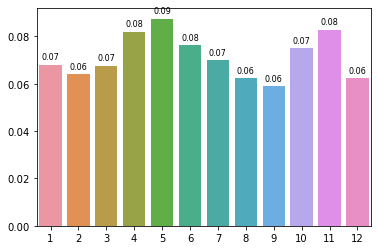

In [533]:
# using matplot lib bar chart
mm=[1,10,11,12,2,3,4,5,6,7,8,9]# adding this in oder to over come series error in sorting
ploat = sns.barplot(mm,comp_rate)
anote(ploat)

### To represent monthlly complain rate for each device 

In [496]:
# First I need to create Seprate data set for each device Usage
UsageC=Usage.loc[Usage['Device']=='C']
UsageT=Usage.loc[Usage['Device']=='T']
UsageF=Usage.loc[Usage['Device']=='F']
UsageO=Usage.loc[Usage['Device']=='O']


In [497]:
# First I need to create Seprate data set for each device Complaint
ComplainC=complaint.loc[complaint['Device']=='C']
ComplainT=complaint.loc[complaint['Device']=='T']
ComplainF=complaint.loc[complaint['Device']=='F']
ComplainO=complaint.loc[complaint['Device']=='O']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


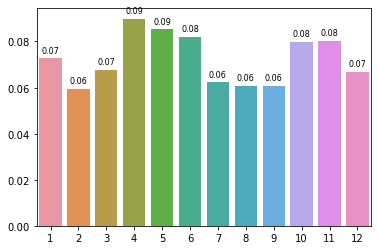

In [539]:
# I used group by fucntion which will show the occurance of each variable for each month that 
#we can notice in bellow graph
Usage_permonth_deviceC = UsageC.groupby(by="Month", dropna=False).count()
Complain_permonth_deviceC = ComplainC.groupby(by="Month", dropna=False).count()

comp_rateC = Complain_permonth_deviceC['CSN']/Usage_permonth_deviceC['USN']
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
plot = sns.barplot(mm,comp_rateC)
anote(plot)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


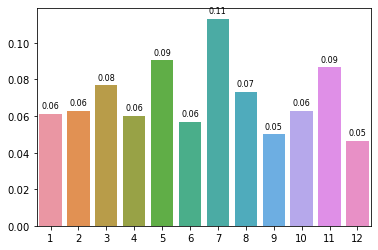

In [540]:
Usage_permonth_deviceT = UsageT.groupby(by="Month", dropna=False).count()
Complain_permonth_deviceT = ComplainT.groupby(by="Month", dropna=False).count()

comp_rateT = Complain_permonth_deviceT['CSN']/Usage_permonth_deviceT['USN']
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
plot = sns.barplot(mm,comp_rateT)
anote(plot)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


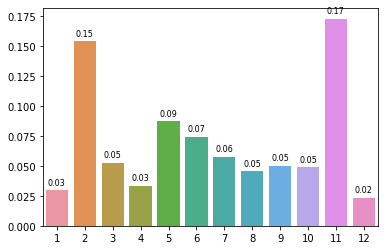

In [541]:
Usage_permonth_deviceF = UsageF.groupby(by="Month", dropna=False).count()
Complain_permonth_deviceF = ComplainF.groupby(by="Month", dropna=False).count()

comp_rateF = Complain_permonth_deviceF['CSN']/Usage_permonth_deviceF['USN']
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
plot = sns.barplot(mm,comp_rateF)
anote(plot)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


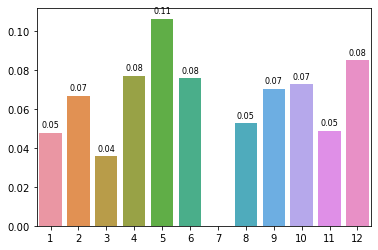

In [542]:
Usage_permonth_deviceO = UsageO.groupby(by="Month", dropna=False).count()
Complain_permonth_deviceO = ComplainO.groupby(by="Month", dropna=False).count()

comp_rateO = Complain_permonth_deviceO['CSN']/Usage_permonth_deviceO['USN']

mm=[1,10,11,12,2,3,4,5,6,7,8,9]
plot = sns.barplot(mm,comp_rateO)
anote(plot)

### The following bar chart represents the monthly complain rate for each device. X axis represetn month by nymbers.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Device Type :O')

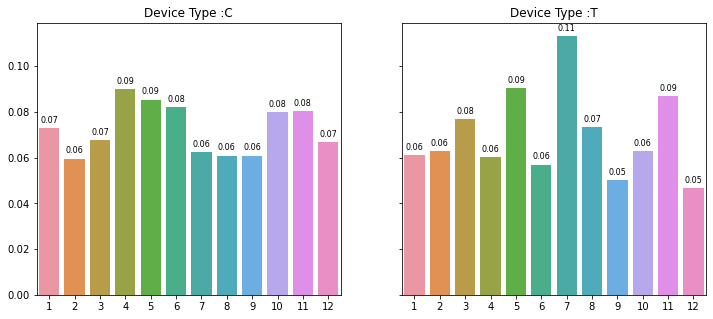

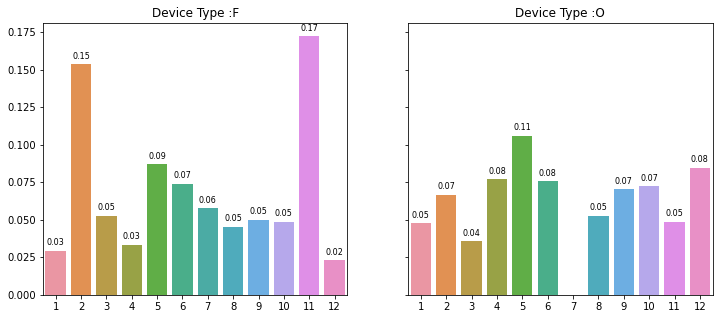

In [572]:
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
fig, ax1 = plt.subplots(1,2,figsize=(12,5),sharey=True)
fig, ax2 = plt.subplots(1,2,figsize=(12,5),sharey=True)
plot1 = sns.barplot(x=mm,y=comp_rateC,ax=ax1[0])
anote(plot1)
ax1[0].set_title('Device Type :C')
plot2 = sns.barplot(x=mm,y=comp_rateT,ax=ax1[1])
anote(plot2)
ax1[1].set_title('Device Type :T')
plot3 = sns.barplot(mm,comp_rateF,ax=ax2[0])
anote(plot3)
ax2[0].set_title('Device Type :F')
plot4 = sns.barplot(mm,comp_rateO,ax=ax2[1])
anote(plot4)
ax2[1].set_title('Device Type :O')

In [504]:
a = UsageC['Device'].value_counts()
complainrate_symptom_c = []
complainrate_symptom_c = b/a[0]

print(complainrate_symptom_c)
temp = {}

# for i in range(len(complainrate_symptom_c)):
#     temp['c'].append(complainrate_symptom_c[i])

LP    0.019173
DI    0.013623
BL    0.013320
PS    0.013017
HM    0.011806
CS    0.007064
Name: Symptom, dtype: float64


In [505]:
#for selecting thte number of usage for each location
# This will select the values for all type of location
Usage_locaiton_D = Usage.loc[Usage['Location']=='D']
Usage_locaiton_U = Usage.loc[Usage['Location']=='U']
Usage_locaiton_O = Usage.loc[Usage['Location']=='O']
Usage_locaiton_J = Usage.loc[Usage['Location']=='J']

In [508]:
#for selecting thte number of complain for each device
# This will select the values for each device overall
Complain_locaiton_D = complaint.loc[complaint['Location']=='D']
Complain_locaiton_U = complaint.loc[complaint['Location']=='U']
Complain_locaiton_O = complaint.loc[complaint['Location']=='O']
Complain_locaiton_J = complaint.loc[complaint['Location']=='J']

<BarContainer object of 12 artists>

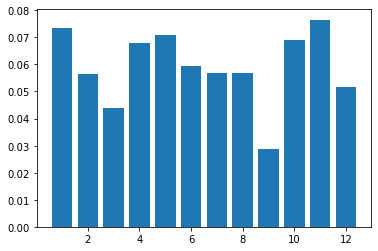

In [517]:
# I used group by fucntion which will show the occurance of each variable for each month that 
#we can notice in bellow graph
Usage_permonth_locationD = Usage_locaiton_D.groupby(by="Month", dropna=False).count()
Complain_permonth_locationD = Complain_locaiton_D.groupby(by="Month", dropna=False).count()

comp_rate_locationD = Complain_permonth_locationD['CSN']/Usage_permonth_locationD['USN']
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
plt.bar(mm,comp_rate_locationD)

<BarContainer object of 12 artists>

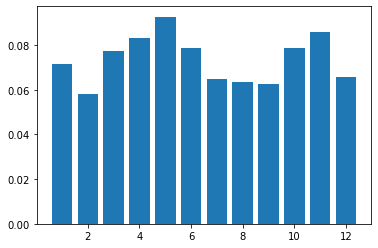

In [518]:
Usage_permonth_locationU = Usage_locaiton_U.groupby(by="Month", dropna=False).count()
Complain_permonth_locationU = Complain_locaiton_U.groupby(by="Month", dropna=False).count()

comp_rate_locationU = Complain_permonth_locationU['CSN']/Usage_permonth_locationU['USN']
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
plt.bar(mm,comp_rate_locationU)

<BarContainer object of 12 artists>

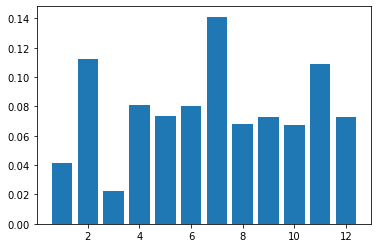

In [520]:
Usage_permonth_locationO = Usage_locaiton_O.groupby(by="Month", dropna=False).count()
Complain_permonth_locationO = Complain_locaiton_O.groupby(by="Month", dropna=False).count()

comp_rate_locationO = Complain_permonth_locationO['CSN']/Usage_permonth_locationO['USN']
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
plt.bar(mm,comp_rate_locationO)

<BarContainer object of 12 artists>

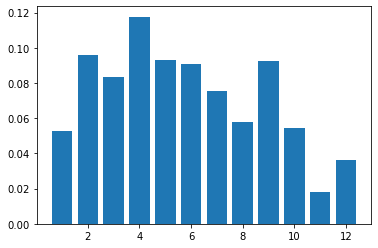

In [521]:
Usage_permonth_locationJ = Usage_locaiton_J.groupby(by="Month", dropna=False).count()
Complain_permonth_locationJ = Complain_locaiton_J.groupby(by="Month", dropna=False).count()

comp_rate_locationJ = Complain_permonth_locationJ['CSN']/Usage_permonth_locationJ['USN']
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
plt.bar(mm,comp_rate_locationJ)

### The following bar chart represents the monthly complain rate for each device. X axis represetn month by nymbers.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location :J')

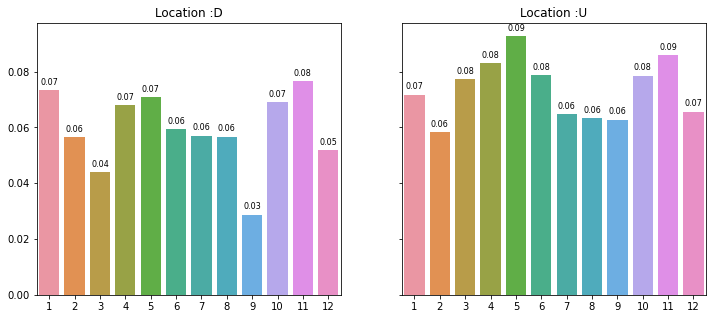

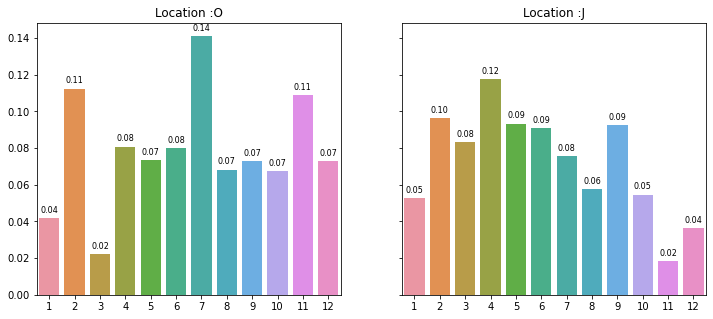

In [576]:
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
fig, ax1 = plt.subplots(1,2,figsize=(12,5),sharey=True)
fig, ax2 = plt.subplots(1,2,figsize=(12,5),sharey=True)
plot1 = sns.barplot(x=mm,y=comp_rate_locationD,ax=ax1[0])
anote(plot1)
ax1[0].set_title('Location :D')
plot2 = sns.barplot(x=mm,y=comp_rate_locationU,ax=ax1[1])
anote(plot2)
ax1[1].set_title('Location :U')
plot3 = sns.barplot(x=mm,y=comp_rate_locationO,ax=ax2[0])
anote(plot3)
ax2[0].set_title('Location :O')
plot4 = sns.barplot(mm,comp_rate_locationJ,ax=ax2[1])
anote(plot4)
ax2[1].set_title('Location :J')

In [605]:
#for selecting thte number of usage for each device
# This will select the values for all device type
Complain_symptom_DI = complaint.loc[complaint['Symptom']=='DI']
Complain_symptom_LP = complaint.loc[complaint['Symptom']=='LP']
Complain_symptom_BL = complaint.loc[complaint['Symptom']=='BL']
Complain_symptom_PS = complaint.loc[complaint['Symptom']=='PS']
Complain_symptom_HM = complaint.loc[complaint['Symptom']=='HM']
Complain_symptom_CS = complaint.loc[complaint['Symptom']=='CS']

In [611]:
Complain_permonth_symptom_DI = Complain_symptom_DI.groupby(by="Month", dropna=False).count()
comp_rate_symptom_DI = Complain_permonth_symptom_DI['CSN']/Usage_permonth['USN']

Complain_permonth_symptom_LP = Complain_symptom_LP.groupby(by="Month", dropna=False).count()
comp_rate_symptom_LP = Complain_permonth_symptom_LP['CSN']/Usage_permonth['USN']

Complain_permonth_symptom_BL = Complain_symptom_BL.groupby(by="Month", dropna=False).count()
comp_rate_symptom_BL = Complain_permonth_symptom_BL['CSN']/Usage_permonth['USN']

Complain_permonth_symptom_PS = Complain_symptom_PS.groupby(by="Month", dropna=False).count()
comp_rate_symptom_PS = Complain_permonth_symptom_PS['CSN']/Usage_permonth['USN']

Complain_permonth_symptom_HM = Complain_symptom_HM.groupby(by="Month", dropna=False).count()
comp_rate_symptom_HM = Complain_permonth_symptom_HM['CSN']/Usage_permonth['USN']

Complain_permonth_symptom_CS = Complain_symptom_CS.groupby(by="Month", dropna=False).count()
comp_rate_symptom_CS = Complain_permonth_symptom_CS['CSN']/Usage_permonth['USN']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Symptom: CS')

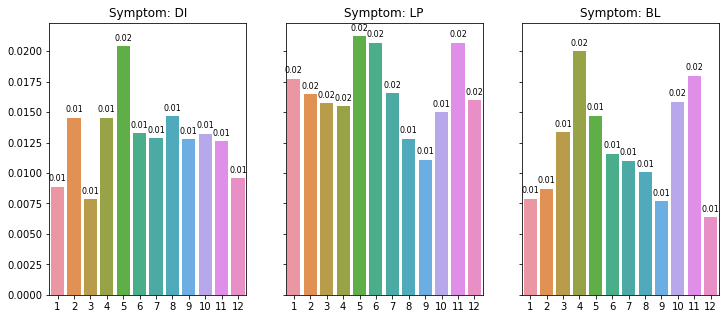

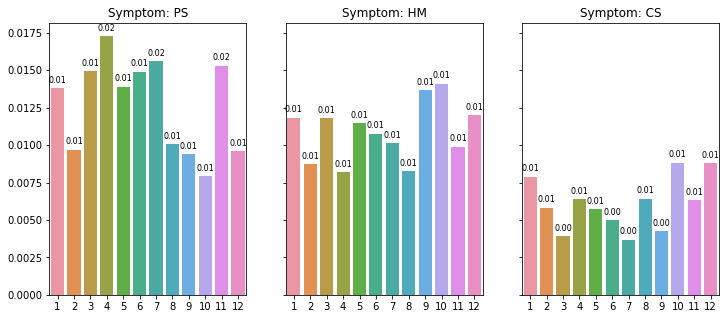

In [610]:
mm=[1,10,11,12,2,3,4,5,6,7,8,9]
fig, ax1 = plt.subplots(1,3,figsize=(12,5),sharey=True)
fig, ax2 = plt.subplots(1,3,figsize=(12,5),sharey=True)
plot1 = sns.barplot(x=mm,y=comp_rate_symptom_DI,ax=ax1[0])
anote(plot1)
ax1[0].set_title('Symptom: DI')
plot2 = sns.barplot(x=mm,y=comp_rate_symptom_LP,ax=ax1[1])
anote(plot2)
ax1[1].set_title('Symptom: LP')
plot3 = sns.barplot(x=mm,y=comp_rate_symptom_BL,ax=ax1[2])
anote(plot3)
ax1[2].set_title('Symptom: BL')
plot4 = sns.barplot(mm,comp_rate_symptom_PS,ax=ax2[0])
anote(plot4)
ax2[0].set_title('Symptom: PS')
plot4 = sns.barplot(mm,comp_rate_symptom_HM,ax=ax2[1])
anote(plot4)
ax2[1].set_title('Symptom: HM')
plot4 = sns.barplot(mm,comp_rate_symptom_CS,ax=ax2[2])
anote(plot4)
ax2[2].set_title('Symptom: CS')

## 4) Explain the spread of Duration by Symptom. Identify any outliers. How does the spread look? What kind of analysis is required to find the probability that a Device would fail after certain duration of use


In [ ]:
Complain_symptom_DI = complaint.loc[complaint['Symptom']=='DI']
Complain_symptom_LP = complaint.loc[complaint['Symptom']=='LP']
Complain_symptom_BL = complaint.loc[complaint['Symptom']=='BL']
Complain_symptom_PS = complaint.loc[complaint['Symptom']=='PS']
Complain_symptom_HM = complaint.loc[complaint['Symptom']=='HM']
Complain_symptom_CS = complaint.loc[complaint['Symptom']=='CS']

In [612]:
Complain_symptom_DI

,CSN,Device,Location,Symptom,Duration,Date,Month
0,C-221-82070,C,D,DI,0.03,11/4/21,11
7,C-221-88991,T,U,DI,0.13,4/2/21,4
18,C-221-90833,T,U,DI,0.02,9/29/21,9
24,C-221-34351,O,D,DI,0.01,8/21/21,8
27,C-221-92726,T,U,DI,0.08,6/4/21,6
...,...,...,...,...,...,...,...
966,C-221-50812,T,J,DI,4.00,4/15/21,4
967,C-221-74912,F,U,DI,0.22,3/24/21,3
969,C-221-46422,C,U,DI,0.02,11/15/21,11
975,C-221-46840,C,U,DI,0.10,7/6/21,7


In [613]:
Complain_symptom_DI.describe()

,Duration
count,172.000000
mean,25.790581
std,87.322519
min,-0.020000
25%,0.010000
50%,0.030000
75%,0.100000
max,401.730000


### The following box plot represents the min-max and median duration for each symptom. This will depict the overall usage duration for each device combined with each symptom. We can also notice the outliers in these boxplots (represented by small black dots outside the boxplot).

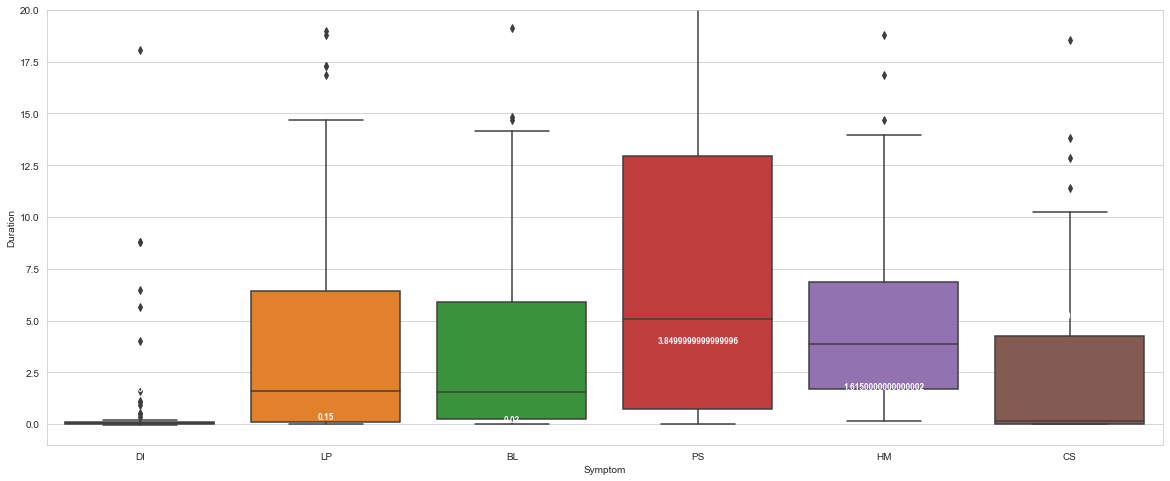

In [672]:
plt.figure(figsize=(20, 8))
boxplt = sns.boxplot(x="Symptom", y="Duration",data=complaint)
plt.ylim(-1, 20)
sns.set_style("whitegrid")
# to add annotation of median to the box plot
medians = complaint.groupby(['Symptom'])['Duration'].median()
vertical_offset = complaint['Duration'].median() * 0.05 # offset from median for display

for xtick in boxplt.get_xticks():
    boxplt.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='bold')


### We can also represent the box plot for each device usage duration for every symptom.

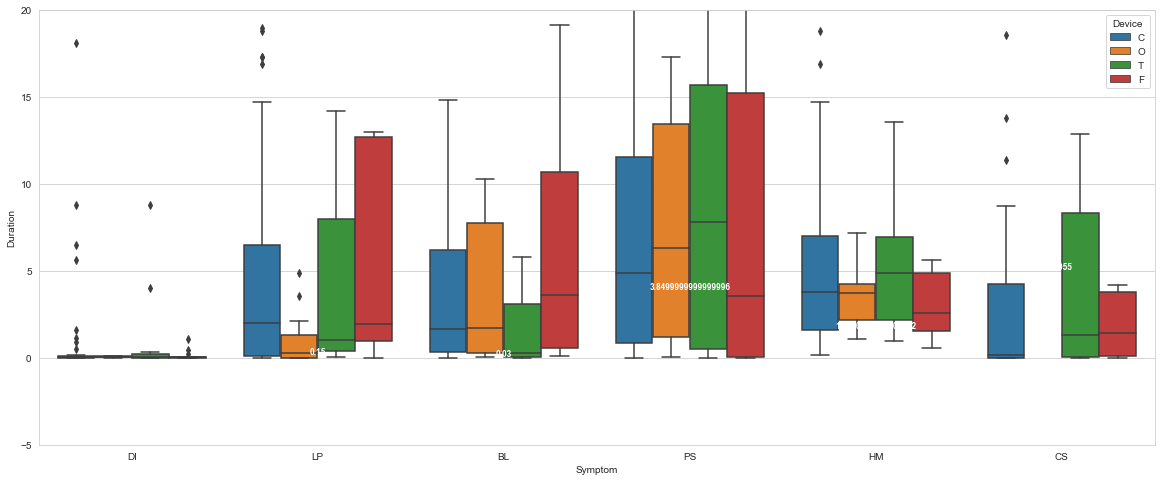

In [676]:
# adding hue to this box plot in oder to get boxplot for each city.
plt.figure(figsize=(20, 8))
boxplt = sns.boxplot(x="Symptom", y="Duration",hue='Device',data=complaint)
plt.ylim(-5, 20)
sns.set_style("whitegrid")
# to add annotation of median to the box plot
medians = complaint.groupby(['Symptom'])['Duration'].median()
vertical_offset = complaint['Duration'].median() * 0.05 # offset from median for display

for xtick in boxplt.get_xticks():
    boxplt.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='bold')



### In the above graph Box plot for the duration is hard to identify. So, I have to make a seprate box plot for DI symptoms which with a range of duration on Y-axsis to (-0.5 to 0.5) 

(-0.5, 0.5)

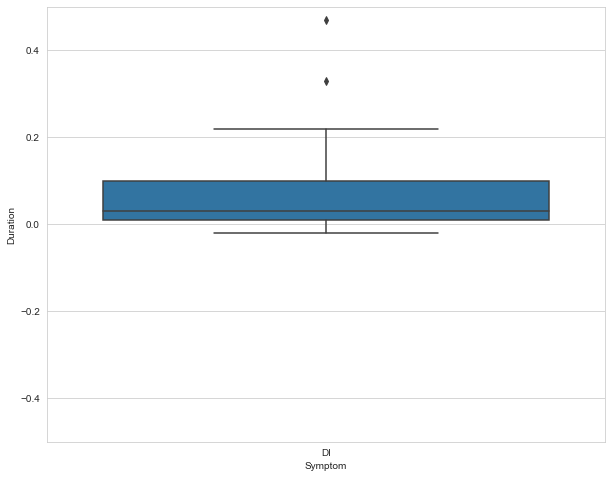

In [681]:
# changing the ylim of this graph
plt.figure(figsize=(10, 8))
sns.boxplot(x="Symptom", y="Duration",data=Complain_symptom_DI)
plt.ylim(-0.5, 0.5)